<center>
    <img src="/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/logo2.png" width="200" />

<h1 style="color: #00BFFF;">Module 6: Vision Models</h1>
</center>

____________

<h2 style="color: #00BFFF;">Introduction to Image Classification using Convolutional Neural Networks (CNNs)</h2>

In today’s lesson, we will dive into **Image Classification using Convolutional Neural Networks (CNNs)** with **PyTorch**, applying it to the **Fashion MNIST dataset**.

Throughout this notebook, we will cover the foundational concepts of **CNNs** through a blend of **theory** and **hands-on** code examples to understand how to build CNNs in **PyTorch** and **TensorFlow-Keras**.

<h3 style="color: #00BFFF;">By the end of this lesson, you'll:</h3>

- **Understand how CNNs work:**
    - Convolutional Layers
    - Filters (Kernels)
    - Pooling Layers
- **Apply** these concepts and **develop** a **multiclass classification** model using **PyTorch**.

<h3 style="color: #00BFFF;">Table of Contents</h3>
<ul>
    <li><a href="#introduction-to-cnns">1. Introduction to Convolutional Neural Networks (CNNs)</a></li>
        <ul>
            <li><a href="#convolutional-layer">1.1. Convolutional Layer</a></li>
            <li><a href="#filter-layer">1.2. Filters (Kernels) and Feature Detection<</a></li>
            <li><a href="#relu-layer">1.3. Activaction Function (ReLu)</a></li>
            <li><a href="#pooling-layer">1.4. Pooling Layer</a></li>
            <li><a href="#hyper-layer">1.5. Hyperparameters; stride, padding</a></li>
        </ul>
    <li><a href="#introduction-to-cnns">2. Use case: Multiclass image classification using PyTorch</a></li>
</ul>

____________

<h3 id="neural-networks" style="color: #008080;">Neural Networks Review</h3>

Before diving into **Convolutional Neural Networks (CNNs)**, let's briefly review the basic **components** of a **neural network**:
- **Input Layer**: Where the input data (features) is fed into the network.
- **Hidden Layers**: Intermediate layers that process and learn from the input data.
- **Output Layer**: The final layer that produces the result (prediction).

We will use a **FeedForward Neural Network (FNN)** (the simplest type) to help illustrate these **components** and how a neural network processes **inputs**, applies **weights**, and produces a **prediction**.

<center>
    <img src="/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/fnn.png" width="380" />
</center>

- In this example, we will **predict** the **price of a car** based on two **input** features: the car's **years** and **km**.
- The **weights** in the hidden layer are chosen between `-1` and `1`. This range reflects the influence without causing extreme outputs.
- Each input feature is multiplied by its corresponding weight, and their `np.sum()` gives the output of each hidden node:
- The **outputs** from the hidden nodes are multiplied by larger random weights (`3000` and `2000`) in the output layer to produce the final **predicted car price**.

In [1]:
import numpy as np

# Input layer
input_layer = np.array([5, 10])  # 5 years old, 10 km

# Hidden Layers: Weights for nodes
weights_node_n1 = np.array([0.5, -0.1])
weights_node_n2 = np.array([0.3, -0.05])

# Calculating values for hidden layer nodes n1 and n2
n1 = np.sum(input_layer * weights_node_n1)
n2 = np.sum(input_layer * weights_node_n2)

# Output of the hidden layer
layer_1_output = np.array([n1, n2])

# Weights for the output layer
output_weights = np.array([3000, 2000]) 

# Calculating the final prediction (output layer - car price)
prediction = np.sum(layer_1_output * output_weights)
print("Predicted Car Price:", int(prediction))

Predicted Car Price: 6500


$$ \text{Output} = f\left(\sum_{i=1}^{n} (w_i \cdot x_i) + b\right) $$

In any neural network, the ouput of a neuron is computed as:
- **Output**: Neuron’s output.
- **f**: Activation function (e.g., ReLU, Sigmoid).
- **w**: Weights for inputs.
- **x**: Input values.
- **b**: Bias term.

In frameworks like **TensorFlow** and **PyTorch**, weights (`w_i`) and biases (`b`) are automatically managed when creating layers.

```python
# Keras
from tensorflow.keras.layers import Dense
layer = Dense(128, activation='relu')

# PyTorch
import torch.nn as nn
layer = nn.Linear(in_features=784, out_features=128)

<h2 id="introduction-to-cnns" style="color: #00BFFF;">1. Introduction to Convolutional Neural Networks (CNNs)</h2>

While traditional **neural networks** can handle various tasks, **Convolutional Neural Networks (CNNs)** are particularly powerful when working with **image**, **speech**, or **audio signal inputs**. CNNs are structured specifically to process **grid-like data**, such as images, by automatically detecting **features**, **patterns**, and **objects** within them.


<h5 style="color: #008080;">CNNs consist of three primary types of layers:</h5>

1. **Convolutional Layers** apply small filters (kernels) over the input image, performing a sliding window operation and generating **feature maps**. The goal is to extract basic features (like edges) in the early layers and more complex features (like object parts) in deeper layers.
2. **Pooling Layers** downsample the output of convolutional layers to reduce dimensionality while retaining essential features.
3. **Fully Connected Layers** (FC) then classify the image based on the features extracted by previous layers. - *we will cover this in another class :)*

Each of these layers plays a crucial role in extracting meaningful features and patterns from the input data, progressing from **basic lines and shapes** to more complex representations.

<h2 id="convolutional-layer" style="color: #00BFFF;">1.1. Convolutional Layers</h2>

The **convolutional layer** is the core building block of a CNN. It is responsible for performing the convolution operation, which involves applying **filters (kernels)** to the input data. 

<h5 style="color: #008080;">How it works:</h5>

- **Input Data**: Typically, this is an image represented as a matrix of pixel values.
- **Filters (Kernels)**: Small matrices that move across the input data to detect specific patterns. Filters are usually 3x3 or 5x5 in size.
    - The filter slides across the input image, calculating the **dot product** between the filter and the input pixels. 
    - The result of this operation is called the **feature map** or **convolved feature**.
- **Feature Map**: The result of applying filters to the input data. This output map highlights specific patterns or features, like edges or textures.

<center>
    <img src="/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/convolution_overview.gif" width="380" />
</center>

- This process is repeated across the entire image, allowing the CNN to detect different features like **edges**, **textures**, or **shapes**.
- Additionally, CNNs use **parameter sharing** in convolutional layers, meaning the same filter (with the same weights) is applied across the entire input, reducing the number of parameters and computational load.

In **PyTorch**, the convolutional layer is created using `nn.Conv2d`. You need to specify:
- **in_channels**: Number of input channels (e.g., 1 for grayscale).
- **out_channels**: Number of filters (output channels).
- **kernel_size**: Size of the filter (e.g., 3x3).

In [2]:
# pip install torch
from torch import nn # Neural neutwork components

# 🚀 PyTorch Convolutional Layer Example
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)

In **TensorFlow** (and **Keras**), you use `Conv2D` to create a convolutional layer. Key parameters include:
- **filters**: Number of filters (output channels).
- **kernel_size**: Size of the filter.

In [3]:
# pip install tensorflow
from tensorflow.keras.layers import Conv2D

conv_layer = Conv2D(filters=1, kernel_size=3, input_shape=(28, 28, 1))

2024-10-06 22:59:04.187539: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/ironhack/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h2 id="filter-layer" style="color: #00BFFF;">1.2. Filters (Kernels) and Feature Detection</h2>

**Filters**, also known as **kernels**, are matrices used in the convolution process to detect patterns in the input image. Each filter focuses on detecting specific features like **edges**, **textures**, or **shapes**.

- **Low-level features**: Detected in earlier layers, such as edges or corners.
- **High-level features**: Detected in later layers, such as complex shapes or objects.

For instance, in the case of recognizing a bicycle, initial layers detect edges and curves, while later layers might identify parts like **wheels** and **frames**, ultimately leading to identifying the entire bicycle.

<center>
    <img src="/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/diagram.png" width="380" />
</center>

<h3 style="color: #008080;">💡 Checking for Understanding</h3>

1. Create a **convolutional layer** with 1 input and 1 output channel, 3x3 filter size

In [4]:
import torch.nn as nn

# You can change the number of output channels to apply multiple filters
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)

2. Modify **filters** (also known as kernels) to observe how they affect the output when applied to an input image

In [5]:
import torch
import cv2
import matplotlib.pyplot as plt

# Load your image sample code
cat_image_path = '/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/cat.png'
input_image = cv2.imread(cat_image_path, 0)
input_image = torch.tensor(input_image, dtype=torch.float32) / 255.0 
input_image = input_image.unsqueeze(0).unsqueeze(0)

In [6]:
# Modify the kernel size here
kernel_size = 3  # You can try different kernel sizes like 3, 5, or 7

In [7]:
# Use your previous CNN
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)

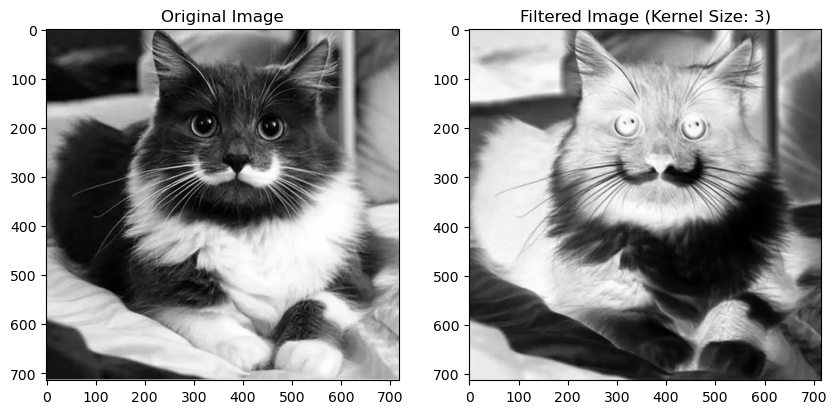

In [8]:
# Apply the convolutional filter to the input image
output = conv_layer(input_image)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_image[0][0], cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(output[0][0].detach(), cmap='gray')
plt.title(f"Filtered Image (Kernel Size: {kernel_size})")

plt.show()

<h2  id="relu-layer" style="color: #00BFFF;">1.3. Activaction Function (ReLu)</h2>

**More on this will be covered in other classes.**

- After the convolution operation, **ReLU** allows the network to capture **non-linear relationships**.
- It helps prevent the **vanishing gradient problem** in deeper networks by maintaining gradients for positive inputs.
  

Here’s the basic operation of ReLU:
$$ \text{ReLU}(x) = \max(0, x) $$

<center>
    <img src="/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/ReLu.png" width="380" />
</center>

<h2 id="pooling-layer" style="color: #00BFFF;">1.4. Pooling Layer</h2>

After a convolutional layer, a **pooling layer** is often used to reduce the spatial dimensions of the feature maps, which helps in **reducing computational load** and **preventing overfitting**.

There are two main types of pooling:
- **Max Pooling**: Selects the maximum value from each patch of the feature map.
- **Average Pooling**: Computes the average value of each patch.

In both cases, pooling layers are used to **downsample** the feature maps, summarizing the presence of important features in the image.

<center>
    <img src="/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/maxpool_animation.gif" width="380" />
</center>

In [9]:
# 🚀 PyTorch Max Pooling Example
pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

# 🚀 TensorFlow/Keras Max Pooling Example
import tensorflow as tf
pool_layer = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)

<h2 id="hyper-layer" style="color: #00BFFF;">1.5. Hyperparameters; stride, padding</h2>

**More on this will be covered in other classes.**

- **Number of Filters**: Defines the depth of the output. For example, using **three** filters would yield **three different feature maps**.
- **Stride**: A smaller stride (e.g., `stride=1`) ensures the filter moves pixel by pixel to capture more detailed features. A larger stride results in a smaller output
- **Padding**: The `padding=1` adds a layer of zeros around the input image, ensuring that the output size remains the same as the input size.
- After the convolution operation, a **Rectified Linear Unit (ReLU)** is typically applied to the feature map to introduce non-linearity.

<h4 style="color: #008080;">Checking for Understanding: Play around with different strides and padding</h4>

In [10]:
from widget import run_conv_simulation

run_conv_simulation()

interactive(children=(IntSlider(value=128, description='input_size', max=512, min=28, step=32), IntSlider(valu…

<h1 id="use-layer" style="color: #00BFFF;">2. Use case: Multiclass image classification using PyTorch</h1>

<center>
    <img src="/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/fashion.png" width="380" />
</center>

> ### 📝 **Fashion MNIST Dataset Overview**
> We are using the **Fashion MNIST dataset** to explore the foundational concepts of **Convolutional Neural Networks (CNNs)**. Our primary **goal** in this notebook is understanding **convolutional layers**, **filters**, and **pooling layers**—the essential building blocks of CNNs that allow automatic detection of patterns in images.
> 
>The **Fashion MNIST dataset** consists of 28x28 grayscale images, each representing a fashion item, classified into 10 different categories.
> 
> - **Train set**: 60,000 images for training.
> - **Test set**: 10,000 images for evaluation.
> - **Classes**: 10 fashion categories including clothing and accessories.
>
> 
> 
> 💡 **Reminder**: Our main focus is on CNN-related concepts, other advanced components in this notebook will be explored more deeply in future lessons! :)

<h1 style="color: #00BFFF;">00 |</h1>

In [11]:
# pip install torch
# pip install torchvision
# pip install torchmetrics
# pip install mlxtend

In [12]:
# 🌐 Computer Vision
import torch
from torch import nn # Neural neutwork components
from torch.utils.data import DataLoader # For batching and loading the data
from torchvision import datasets # To access FashionMNIST
from torchvision.transforms import ToTensor # Convert PIL images to tensors

# 🕒 Utilities
from timeit import default_timer as timer # Training time duration
from tqdm import tqdm
import random

# 📊 Visualization and metrics
import matplotlib.pyplot as plt
import torchmetrics
from torchmetrics import Accuracy, ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

<h3 style="color: #008080;">💡 About CUDA and GPU setup</h3>

> 
> In deep learning, computation speed is crucial, especially for large models and datasets. **CUDA** is a platform by NVIDIA that enables **GPU** acceleration, making training much faster.
> 
> In **Google Colab**, we can check for **GPU** availability and set it up using this code:
> 
> ```python
> device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
> ```
> 
> This line checks if a **GPU** is available. If so, it will use the GPU for computation; otherwise, it will default to the **CPU**.


<h2 style="color: #00BFFF;">Convolutional Neural Network Structure</h2>

In [13]:
# 🚀 Here's how we implement a Convolutional Layer in CNN model using PyTorch:
class Model(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        
        # 🧱 Block 1: Convolutional Layers
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),  # 🎛️ Filter (3x3)
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),  # 🎛️ Another Filter (3x3)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 📉 Pooling Layer (Downsampling)
        )

        # 🧱 Block 2: Convolutional Layers
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),  # 🎛️ Filter for more complex patterns
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),  # 🎛️ Another Filter (3x3) for deeper feature extraction
            nn.ReLU(),
            nn.MaxPool2d(2)  # 📉 Pooling Layer (Reduces spatial dimensions)
        )

        # 🏗️ Final Classifier Layer
        self.classifier = nn.Sequential(
            nn.Flatten(),  # 📄 Flattens the output from 2D to 1D for the Fully Connected Layer
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=output_shape)  # 🔗 Fully Connected Layer (Classification)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)  # 💡 First Convolutional Block
        x = self.block_2(x)  # 💡 Second Convolutional Block
        x = self.classifier(x)  # 🎯 Final classification output
        return x

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [14]:
train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

> - `datasets.FashionMNIST`: Loads the dataset. We apply the `ToTensor()` transformation to convert images to PyTorch tensors.
> - `DataLoader`: Wraps the dataset into batches and shuffles them during training for efficient processing.
> - `BATCH_SIZE`: Specifies the number of samples processed before the model updates. A larger batch size increases memory consumption, while a smaller one can provide more frequent updates.
> - `train_data.clases`: Access the class labels of Fashion MNIST.

<h1 style="color: #00BFFF;">02 | Modeling</h1>

<h3 style="color: #008080;">Train-test</h3>

In [15]:
def train_step(model, data_loader, loss_fn, optimizer, accuracy_metric, device=device):
    model.train()
    train_loss, train_acc = 0, 0
    for X, y in data_loader:
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        train_acc += accuracy_metric(y_pred.argmax(dim=1), y) 

    return train_loss / len(data_loader), train_acc.item() / len(data_loader)

def test_step(model, data_loader, loss_fn, accuracy_metric, device=device):
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            
            test_pred = model(X)
            loss = loss_fn(test_pred, y)
            
            test_loss += loss.item()
            test_acc += accuracy_metric(test_pred.argmax(dim=1), y)

    return test_loss / len(data_loader), test_acc.item() / len(data_loader)

In [16]:
# Initialize the CNN and choose optimizer, loss function, and accuracy metric
model = Model(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()
accuracy_metric = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)

# Track the training time
train_time_start = timer()

# Training loop
epochs = 3
for epoch in tqdm(range(epochs), desc="Training Progress", unit="epoch"):
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, accuracy_metric)
    test_loss, test_acc = test_step(model, test_dataloader, loss_fn, accuracy_metric)
    
    print(f"\n\033[1mEpoch {epoch+1}\033[0m:")
    print(f"🔹 Train loss: {train_loss:.4f}, Train accuracy: {train_acc * 100:.0f}%")
    print(f"🔹 Test loss: {test_loss:.4f}, Test accuracy: {test_acc * 100:.0f}%")

train_time_end = timer()
total_train_time = train_time_end - train_time_start
print(f"\n\033[1mTotal Training Time:\033[0m {total_train_time:.2f} seconds")


Training Progress:  33%|███▎      | 1/3 [00:25<00:50, 25.37s/epoch]


Epoch 1:
🔹 Train loss: 0.5272, Train accuracy: 81%
🔹 Test loss: 0.3915, Test accuracy: 86%


Training Progress:  67%|██████▋   | 2/3 [01:18<00:41, 41.72s/epoch]


Epoch 2:
🔹 Train loss: 0.3387, Train accuracy: 88%
🔹 Test loss: 0.3518, Test accuracy: 87%


Training Progress: 100%|██████████| 3/3 [01:53<00:00, 37.99s/epoch]


Epoch 3:
🔹 Train loss: 0.3077, Train accuracy: 89%
🔹 Test loss: 0.3023, Test accuracy: 89%

Total Training Time: 114.02 seconds


- **GPU Vs CPU for training time**: in future classes, we will explore how to utilize **Google Colab** for accessing GPUs. 
- This will allow us to speed up training and handle larger models more efficiently.

<h3 style="color: #008080;">💡 Checking for Understanding</h3>

1. Modify the `BATCH_SIZE` from `32` to `64` and observe the effect on **training time**. Does a larger batch size speed up training?

    **Hint**: You can adjust the batch size and check how quickly each epoch is processed.

In [17]:
# answer

<h1 style="color: #00BFFF;">03 | Results</h1>

<h3 style="color: #008080;">Predictions</h3>

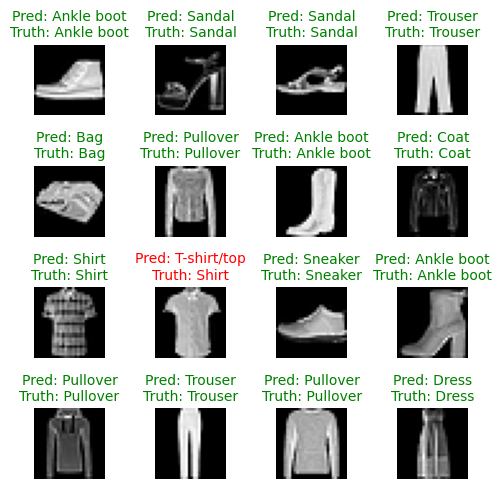

In [18]:
model.eval()
with torch.inference_mode():
    y_pred_tensor = torch.cat([model(X.to(device)).argmax(dim=1).cpu() for X, _ in test_dataloader])

# 16 random samples from the test dataset
test_samples = random.sample(list(test_data), k=16)
test_labels = [label for _, label in test_samples]

# Pedictions for each sample
pred_probs = [model(torch.unsqueeze(sample, dim=0).to(device)).softmax(dim=1).cpu() for sample, _ in test_samples]
pred_classes = [prob.argmax() for prob in pred_probs]

plt.figure(figsize=(5, 5))
for i, (sample, label) in enumerate(test_samples):
    plt.subplot(4, 4, i+1)
    plt.imshow(sample[0], cmap="gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[label]
    plt.title(f"Pred: {pred_label}\nTruth: {truth_label}", fontsize=10, 
              color="g" if pred_label == truth_label else "r")
    plt.axis('off')
plt.tight_layout()
plt.show()


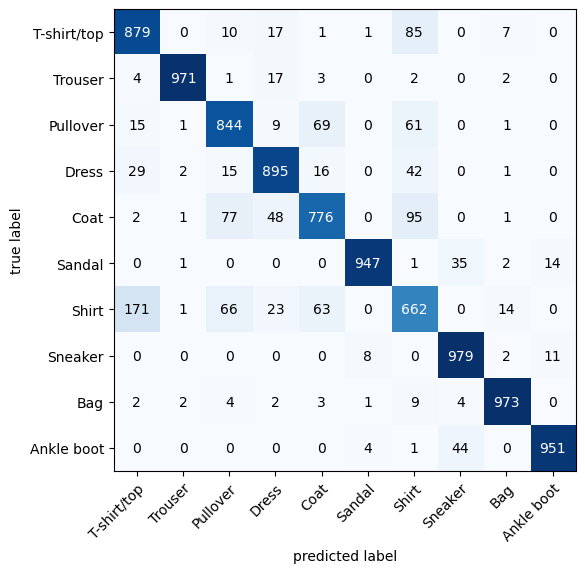

In [19]:
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), class_names=class_names, figsize=(7, 6));

> A **confusion matrix** is a useful tool to evaluate the performance of a classification model by showing the relationship between true labels and model predictions. 
> - **True Positives (TP)**: Found in the diagonal of the confusion matrix. Correct predictions for the positive class.
> - **True Negatives (TN)**: Correct predictions for the negative class.
> - **False Positives (FP)**: Incorrectly predicted as positive.
> - **False Negatives (FN)**: Incorrectly predicted as negative.
>
> In this case, we are using the `torchmetrics` library to compute a confusion matrix for the **Fashion MNIST** dataset, which has multiple classes. 

<h2 style="color: #00BFFF;">Summary</h2>

- **Neural Networks** are composed of layers of neurons, where each neuron computes a weighted sum of inputs, applies an activation function, and produces an output. They are powerful tools for pattern recognition across various types of data.

- **Convolutional Neural Networks (CNNs)** are specialized neural networks designed for processing image data. They use **convolutional layers**, **filters**, and **pooling layers** to extract key features like edges, textures, and shapes.
    - **Convolutional layers** use **filters** (or **kernels**) that slide over the input image, detecting features like edges. These filters have adjustable hyperparameters:
        - **Stride**: Controls the number of pixels the filter moves across the image. A larger stride results in smaller output dimensions.
        - **Padding**: Adds extra pixels around the input image, which helps preserve the spatial dimensions of the output after applying filters.
    - **Pooling layers** perform **downsampling**, reducing the dimensionality of the data while preserving the most important information. **Max pooling** and **average pooling** are commonly used methods.
    - **ReLU** (Rectified Linear Unit) activation introduces non-linearity after each convolution, which helps the network learn complex patterns.


<h2 style="color: #00BFFF;">💡 (Extra) Matrix Multiplication</h2>

- **Matrix multiplication** is an essential operation in **linear algebra** and is widely used in **machine learning** and **neural networks**. 
- The process involves **multiplying** the **rows** of the **first matrix** by the **columns** of the **second matrix**, summing the products to get the values in the resulting matrix.
- The dimensions of the matrices must match specific criteria: The number of **columns** in the first matrix must be equal to the number of **rows** in the second matrix.
- If matrix **A** has dimensions (m x n) and matrix **B** has dimensions (n x p), the resulting matrix **C** will have dimensions (m x p).

<center>
    <img src="/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/matrix_multiplication.png" width="300" />
</center>

For a more interactive explanation and detailed step-by-step visualization of matrix multiplication, you can explore the tool here: [Matrix Multiplication Visualization](http://matrixmultiplication.xyz/).

<center>
<h2 style="color: #808080;"><b>Thank you!</b></h2>
</center>